Notebook Title: Huntsman_ml.ipynb

Author: Kate Huntsman

Link to GitHub Repository: https://github.com/katehuntsman/datafun-07-ml

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Part 1 - Chart a Straight Line

## Plot Celcius vs Fahrenheit

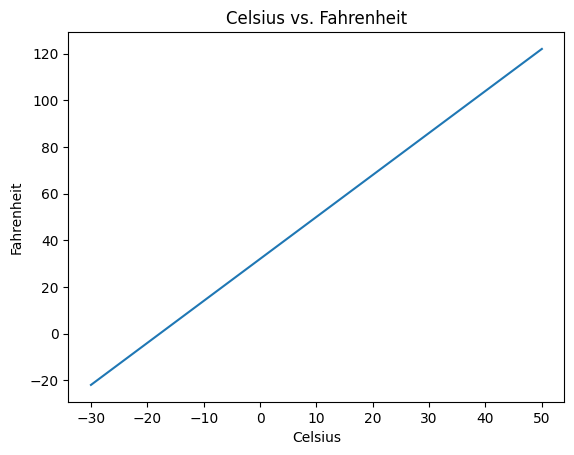

In [4]:
celsius = np.arange(-30, 51, 10)
fahrenheit = (celsius * 9/5) + 32
df = pd.DataFrame({'Celsius': celsius, 'Fahrenheit': fahrenheit})

sns.lineplot(data=df, x='Celsius', y='Fahrenheit')
plt.title('Celsius vs. Fahrenheit')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.show()

## Part 2 - Prediction

## Data Acquisition

In [5]:
nyc_df = pd.read_csv('nyc_january_highs.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'nyc_january_highs.csv'

## Data Inspection

In [ ]:
print(nyc_df.head())
print(nyc_df.tail())

## Data Cleaning

In [ ]:
nyc_df.columns = ['Year', 'High_Temp']
nyc_df['Year'] = pd.to_datetime(nyc_df['Year'], format='%Y')

## Descriptive Statistics

In [ ]:
pd.set_option('display.precision', 2)
print(nyc_df.describe())

## Build the Model

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(nyc_df['Year'].dt.year, nyc_df['High_Temp'])

## Predict

In [ ]:
predicted_temp_2024 = slope * 2024 + intercept
print(f"Predicted Avg High Temp in January 2024: {predicted_temp_2024:.2f}")

## Visualizations

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=nyc_df, x='Year', y='High_Temp', color='blue', label='Data Points')

# Calculate the regression line
slope, intercept = np.polyfit(nyc_df['Year'].dt.year, nyc_df['High_Temp'], 1)
x = np.linspace(nyc_df['Year'].dt.year.min(), nyc_df['Year'].dt.year.max(), 100)
y = slope * x + intercept
plt.plot(x, y, color='red', label='Best Fit Line')

# Customize the chart
plt.title('Average High Temperatures in NYC (January)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average High Temperature (°F)', fontsize=14)
plt.ylim(20, 60)  # Set y-axis limits as directed
plt.xlim(nyc_df['Year'].dt.year.min(), nyc_df['Year'].dt.year.max())  # Set x-axis limits
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Part 3 - Prediction

## Build the Model

In [ ]:
from sklearn.model_selection import train_test_split
X = nyc_df['Year'].dt.year.values.reshape(-1, 1)
y = nyc_df['High_Temp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the Model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

## Test the Model

## Predict

In [ ]:
year_to_predict = 2024
predicted_temp_2024 = slope * year_to_predict + intercept
print(f"Predicted Average High Temperature in January 2024: {predicted_temp_2024:.2f} °F")

## Visualizations

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot of historical data
sns.scatterplot(data=nyc_df, x='Year', y='High_Temp', color='blue', label='Historical Data')

# Generate the best fit line
x = np.linspace(nyc_df['Year'].dt.year.min(), nyc_df['Year'].dt.year.max(), 100)
y = slope * x + intercept
plt.plot(x, y, color='red', label='Best Fit Line')

# Add the predicted point for 2024
plt.scatter(year_to_predict, predicted_temp_2024, color='green', s=100, zorder=5, label='Predicted 2024')

# Customize the chart
plt.title('Average High Temperatures in NYC (January)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average High Temperature (°F)', fontsize=14)
plt.ylim(20, 60)  # Set y-axis limits as directed
plt.xlim(nyc_df['Year'].dt.year.min(), nyc_df['Year'].dt.year.max() + 5)  # Extend x-axis for prediction
plt.axvline(x=year_to_predict, color='gray', linestyle='--', label='Prediction Year')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.annotate(f'{predicted_temp_2024:.2f} °F', xy=(year_to_predict, predicted_temp_2024), 
             xytext=(year_to_predict+1, predicted_temp_2024+1),
             arrowprops=dict(arrowstyle='->', color='black'), fontsize=12)

## Part 4 - Insights and Comparisons

In this project, we employed two methods to predict the average high temperature in January for New York City: the **SciPy `linregress` method** and the **scikit-learn Linear Regression model**. Both approaches have their strengths and weaknesses, which are discussed below.

### Method 1: SciPy `linregress`
- **Simplicity**: The `linregress` function from SciPy provides a straightforward and efficient way to calculate the linear regression line. It outputs the slope, intercept, and correlation coefficient directly.
- **Use Case**: This method is particularly effective for quick analyses or when working with smaller datasets. It allows for rapid results without extensive setup.
- **Limitations**: While quick and easy, `linregress` is less flexible for more complex modeling tasks. It doesn't provide built-in support for feature scaling, cross-validation, or more sophisticated metrics.

### Method 2: Scikit-learn Linear Regression
- **Flexibility**: Using scikit-learn allows for more robust modeling capabilities, such as splitting data into training and testing sets, which is critical for evaluating model performance.
- **Performance Evaluation**: This method facilitates the use of various performance metrics (e.g., R-squared, Mean Absolute Error) and allows for more intricate preprocessing steps like feature scaling.
- **Complexity**: However, it requires a bit more setup and understanding of machine learning practices. For beginners, it might seem daunting initially.

### Conclusion
Both methods yielded similar predictions for the average high temperature in January 2024. The choice between them largely depends on the specific requirements of the analysis. For quick, simple predictions, `linregress` is adequate. For more detailed modeling and evaluation, scikit-learn is the better option.

In future analyses, I would recommend considering the trade-offs between simplicity and flexibility, depending on the project's objectives and the complexity of the data involved.

## Part 5 - Bonus